Analysing the Airbnb Data for Data Interpretation and Price Modelling

In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
# Importing raw CSV file as a Pandas Dataframe

raw_data = pd.read_csv('listings.csv')
print(raw_data.shape) # checking data dimensions

# Quick overview of the first 20 rows of the data
raw_data.head(n= 20)

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


The next steps is to perform some initial pre-processing in the raw data, such as:
i) REMOVE the '%' symbol from variables (or columns) describing rates and CONVERT them to numerical variables.
ii) REMOVE the '$' symbol from variables describing prices and CONVERT them to numerical variables.

These initial pre-processing steps allow the extraction of more informative statistics (e.g. mean, standard deviation, etc) from these variables as now they can be treated as numerical, as well as potentially include them later as predictors of machine learnign models for either regression, exploration or classification purposes.  

In [3]:
# Performing the pre-processing steps listed above
data_pp = raw_data.copy()

vars1 = ['host_response_rate', 'host_acceptance_rate']
vars2 = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']

for var1 in vars1:
    data_pp[var1] = data_pp[var1].str.replace('%', '').astype(float)

for var2 in vars2:
    data_pp[var2] = data_pp[var2].str.replace(',', '').str.replace('$', '').astype(float)

del var1, var2, vars1, vars2

# Quick overview of the first 10 rows of data_pp to validate the actions above
data_pp.head(n= 10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


Question 1:

What is the averaged price per accommodate in the different neighbourhoods of the city ?

The bar plot below shows that averaged prices per person (i.e. daily price of a given accommodation divided by the number of accommodates) range between 30 til 50 US$ in Seatle city, in which the most expensive neighbourhoods (per person) in average are Interbay, Cascade, Queen Anne, Downtown and Capitol Hill, while the least expensive neighbourhood are Seward Park, Northgate, Delridge and Rainier Valley.
The error bars in the plot denote the standard deviation of the prices, which quantifies the variability of the prices within each neighbourhood. For instance, the highest variability of prices per person occurs in the neighbourhood Magnolia, and the lowest variability occurs in Seward Park.

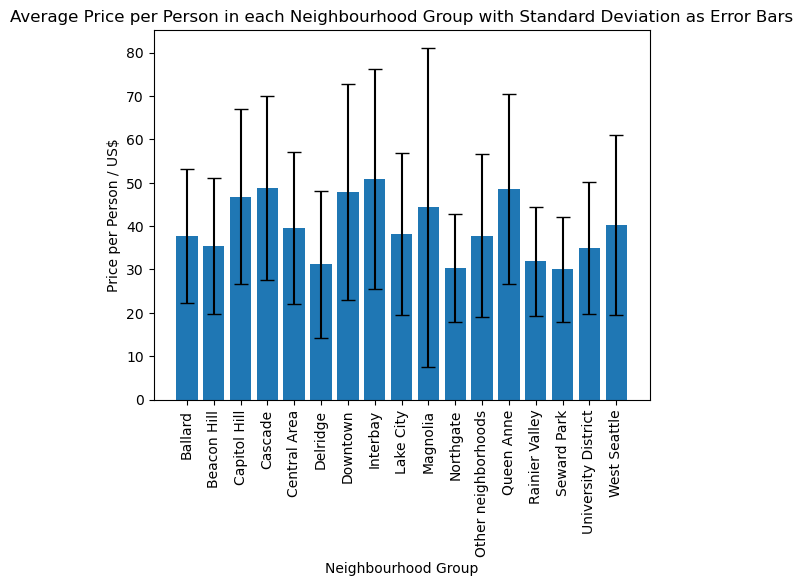

In [4]:
# Plotting the price per accommodate as function of the location (Neighbourhood Group)

price_per_acc = pd.concat([data_pp['neighbourhood_group_cleansed'], data_pp['price']/data_pp['accommodates']], axis=1)

average_price_per_region = price_per_acc.groupby('neighbourhood_group_cleansed')[0].mean()
std_price_per_region = price_per_acc.groupby('neighbourhood_group_cleansed')[0].std()

# Plotting the bar plot with error bars
plt.figure()
plt.bar(average_price_per_region.index, average_price_per_region, yerr=std_price_per_region, capsize=5)
plt.title('Average Price per Person in each Neighbourhood Group with Standard Deviation as Error Bars')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price per Person / US$')
plt.xticks(rotation=90)
plt.show()


Question 2:

Is there any correlation between the response rate by the host and the price of the accommodation - normalized by the number of accommodates? The intent here is to identify if there is any trend indicating that relatively cheaper accommodations (i.e. lower price/number of accommodates ratio) eventually have also a lower response rate by the host, in other words, they are more difficult to book.

The plots bellow show that there is NOT a clear indication that cheaper accommodations are in general also harder to be booked (Pearsons correlation coefficient = -0.01). Despite less accommodations with normalized price above US$ 50 have response rates lower than 80% in comparison with accommodations with normalized price below US$ 50, the sampling size for the first group (price per accommodate < US$ 50) is significantly higher than in the second group (price per accommodate < US$ 50). The plot also shows that the averaged response rate for the accommodations in Seatle is 94.89 %.

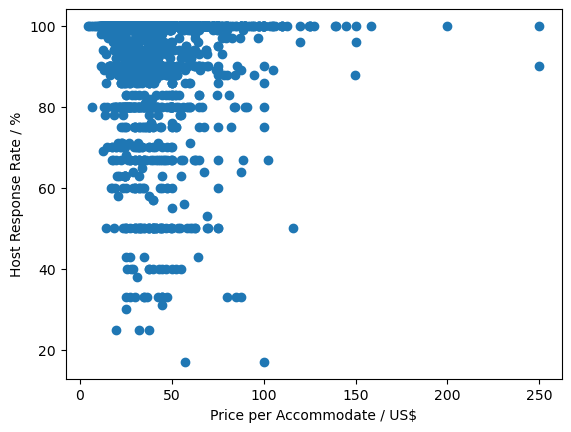

Pearson Correlation Coefficient - Price per Accommodate x Host Response Rate: -0.014071112462002723
Averaged Host Response Rate: 94.88679817905918


In [5]:
# Plotting the price per accommodate as function of the response rate by the host
plt.figure()
plt.scatter(data_pp['price']/data_pp['accommodates'], data_pp['host_response_rate'])
plt.xlabel('Price per Accommodate / US$')
plt.ylabel('Host Response Rate / %')
plt.show()

print('Pearson Correlation Coefficient - Price per Accommodate x Host Response Rate: {}'.format(data_pp['price'].corr(data_pp['host_response_rate'])))
print('Averaged Host Response Rate: {}'.format(data_pp['host_response_rate'].mean()))


Question 3:

How the 10 most abundant property types are distributted accross the neighbourhoods of Seatle?

The ranking of the property types in Seatle shows that houses and appartments are by far the dominant properties available. In general there are more houses available per neighbourhood than apartments in Seatle, with some exceptions such as in the neighbourhoods Capitol Hill, Cascade, Downtown, Queen Anne and University District. On the other hand, townhouses are the third most abbudant property type, especially in Central Area, and Condominium (4th most abundant) are most located in Downtown. 


In [6]:
# Displaying the 10 most common property types
proptype_neigh_10 = data_pp.groupby('property_type').count().sort_values(by='id', ascending=False).head(10)['id']
print(proptype_neigh_10)

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Name: id, dtype: int64


Text(0, 0.5, 'Number of Properties')

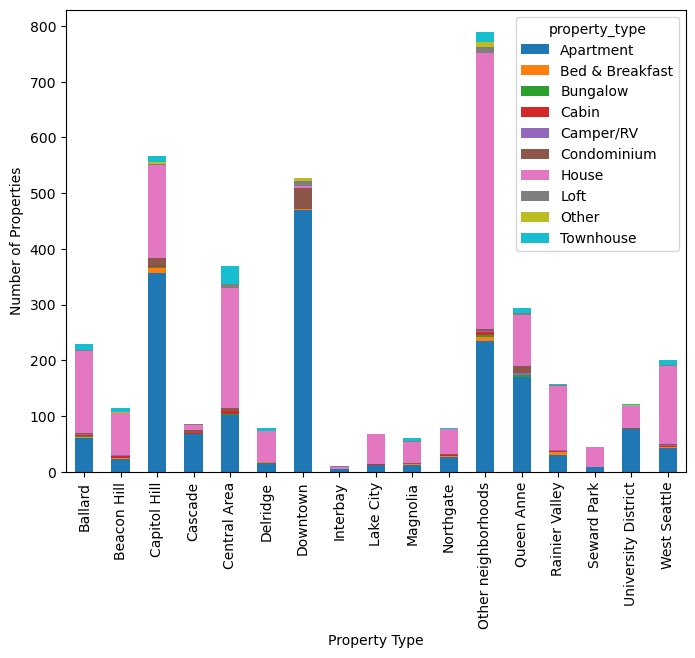

In [7]:
# Displaying the 10 most common property types in each neighbourhood group

# Filtering the data to keep only the 10 most abundant property types
filtered_df = data_pp[data_pp['property_type'].isin(proptype_neigh_10.index)]
filtered_df = filtered_df.groupby(['property_type', 'neighbourhood_group_cleansed']).size().reset_index().pivot(columns='property_type', index='neighbourhood_group_cleansed', values=0)

# Plotting the stacked bar plot
ax = filtered_df.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel('Property Type')
ax.set_ylabel('Number of Properties')

Question 4:

Which features in the dataset have the higher linear correlation with the price of an accommodation?

In [8]:
# Calculating the correlation coefficients between numeric features selected by domain-knowledge and the price

features_sel = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'review_scores_rating', 'availability_30', 'availability_60', 'availability_90', 
         'availability_365', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
         'review_scores_value', 'reviews_per_month']

# Converting categorical numeric features to float
for feature in features_sel:
    data_pp[feature] = data_pp[feature].astype(float)

# Showing the correlation matrix
data_sel = data_pp[features_sel + ['price']]
corr = data_sel.corr()
corr.style.background_gradient(cmap='coolwarm')

,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
accommodates,1.000000,0.538439,0.770974,0.861119,0.285680,0.657223,0.148390,0.017097,-0.013101,-0.043169,-0.048761,-0.060468,-0.031535,-0.072978,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041,-0.144150,0.652218
bathrooms,0.538439,1.000000,0.610937,0.532838,0.299458,0.545006,0.079445,0.006358,0.045101,-0.039447,-0.049399,-0.057346,-0.002326,-0.092147,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297,-0.167894,0.516424
bedrooms,0.770974,0.610937,1.000000,0.753167,0.331019,0.622305,0.108857,0.011957,0.023257,-0.076559,-0.090212,-0.103121,-0.049788,-0.105555,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208,-0.230287,0.627720
beds,0.861119,0.532838,0.753167,1.000000,0.292765,0.626595,0.130843,0.002670,-0.000720,-0.028571,-0.036433,-0.047570,-0.009773,-0.089077,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102,-0.149079,0.589525
security_deposit,0.285680,0.299458,0.331019,0.292765,1.000000,0.436543,0.122209,0.100860,0.044818,-0.029551,-0.034546,-0.038498,-0.008408,-0.134896,0.011408,0.035371,0.043439,0.025713,0.042217,0.033993,-0.140299,0.373195
cleaning_fee,0.657223,0.545006,0.622305,0.626595,0.436543,1.000000,0.067146,0.024157,-0.004991,0.035443,0.018683,0.008245,0.061467,-0.175944,-0.033504,0.047078,-0.064087,-0.055294,0.002241,-0.082490,-0.303313,0.656938
extra_people,0.148390,0.079445,0.108857,0.130843,0.122209,0.067146,1.000000,-0.010692,-0.035063,0.026570,0.021808,0.026427,0.012101,0.044395,-0.033818,0.006546,-0.067283,-0.076528,-0.008176,-0.052175,0.004094,0.127961
minimum_nights,0.017097,0.006358,0.011957,0.002670,0.100860,0.024157,-0.010692,1.000000,0.001392,0.013205,0.010290,0.009076,0.009087,-0.013818,-0.014492,-0.032283,-0.023015,0.006334,0.013911,-0.009382,-0.034225,0.017297
review_scores_rating,-0.013101,0.045101,0.023257,-0.000720,0.044818,-0.004991,-0.035063,0.001392,1.000000,-0.051439,-0.048460,-0.038022,-0.038600,0.036242,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534,0.087313,0.055551
availability_30,-0.043169,-0.039447,-0.076559,-0.028571,-0.029551,0.035443,0.026570,0.013205,-0.051439,1.000000,0.936122,0.875778,0.503881,0.074611,-0.057468,0.009053,-0.040999,-0.030698,-0.041912,-0.091919,0.053386,-0.037653


Q4: The correlation coefficient matrix reveals that price has significant linear correlation (coefficients > 0.5) with the features 'accommodates', 'bathrooms', 'bedrooms', 'beds' and 'cleaning_fee', and a lower linear correlation (coefficients > 0.1 and < 0.5) for 'number_of_reviews' and 'reviews_per_month'. These results indicate that not only the ammount of utilities in the accommodations dictates the price (as expected), but also the number of reviews. Interestingly, the number of reviews is showing a negative correlation with price, which is understandable considering that cheaper accommodations tend to have more demand from the customers of Airbnb. 



Question 5:

Can we leverage Machine Learning to predict the price of an accomodation based on the features selected by domain-knowledge? 

Considering that pure categorical variables, such as the location of the accommodations (neighbourhood_group_cleansed), property type and cancelation policies may also play a role on the decision about price by the hosts, these variables were next included on the 'features_sel' - after one-hot-encoding - and next a predictive model using 1) linear regression and 2) random forest were built to predict 'price'. The intent is to i) assess the possibility of modelling the price using the selected features, and ii) identify the most important features that are related to the price.  

In [9]:
# Selecting the target features in the dataset

data_sel = data_pp[features_sel + ['neighbourhood_group_cleansed','property_type','cancellation_policy','price']]

# HANDLING MISSING DATA VALUES

# Inspecting the relative abundance of missing values in each feature
missing_values = data_sel.isnull().sum()
print("Percentage of Missing values: {}".format((missing_values/len(data_sel))*100))

Percentage of Missing values: accommodates                     0.000000
bathrooms                        0.419068
bedrooms                         0.157150
beds                             0.026192
security_deposit                51.126244
cleaning_fee                    26.977475
extra_people                     0.000000
minimum_nights                   0.000000
review_scores_rating            16.946045
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
number_of_reviews                0.000000
review_scores_accuracy          17.234154
review_scores_cleanliness       17.103195
review_scores_checkin           17.234154
review_scores_communication     17.050812
review_scores_location          17.155579
review_scores_value             17.181771
reviews_per_month               16.422211
neighbourhood_group_cleansed     0.000000
property_type                    0.026192
canc

In [11]:
# MORE DATA PRE-PROCESSING

# Removing feature 'security_deposit' from the selected features - missing data percentage > 50%
data_sel = data_sel.drop(['security_deposit'], axis=1)

# One-hot encoding the categorical features
data_sel = pd.get_dummies(data_sel).astype(float)

# Replacing missing data by the median of the feature (since there are missing values also in categorical features)
data_sel.fillna(data_sel.median(), inplace=True)
 

Root Mean Squared Error for training data 49.593725
R2 training data 0.707556
Mean squared error for test data 55.945827
R2 test data 0.582667


Text(0.5, 1.0, 'Random Forest Regression Model Variable Importance')

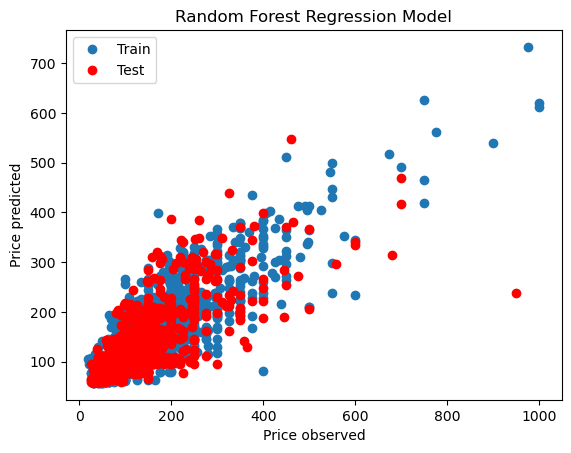

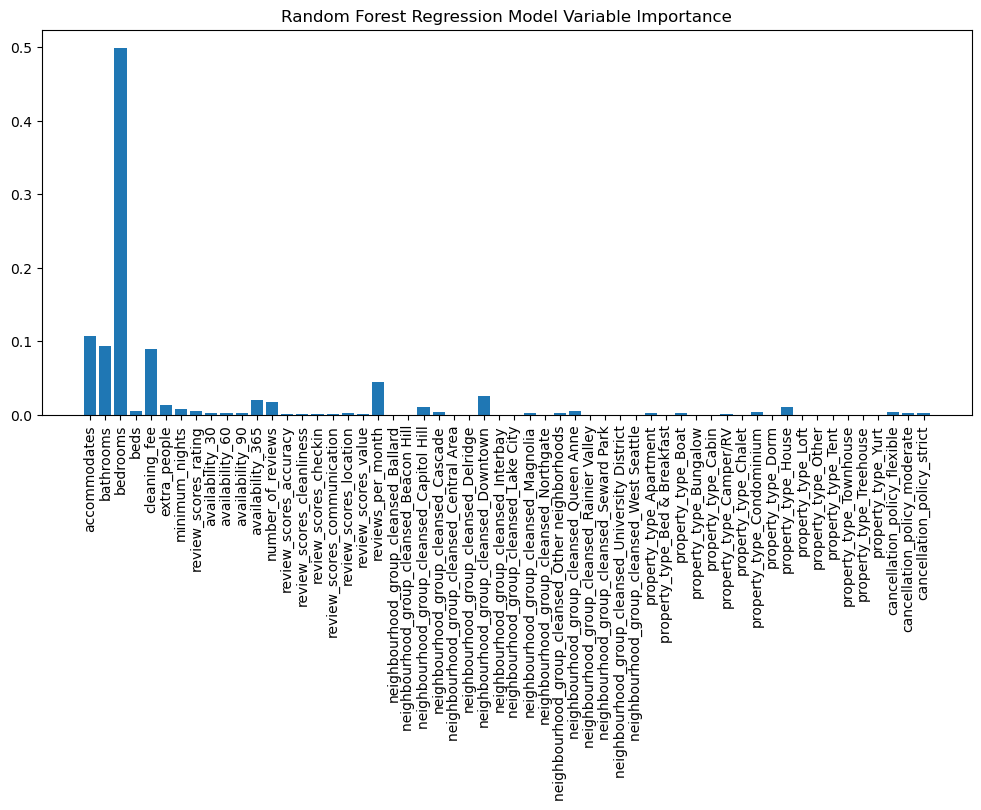

In [12]:
# Splitting Data into Training and Test sets

X_train, X_test, y_train, y_test = train_test_split(data_sel.drop(['price'], axis=1), data_sel['price'], test_size=0.3, random_state=13)

# Fitting Linear Regression model
rf_model = RandomForestRegressor(n_estimators=500, max_depth=5, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict((X_train))
rmse = root_mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print("Root Mean Squared Error for training data %f" % rmse)
print('R2 training data %f' % r2)


y_pred = rf_model.predict((X_test))
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error for test data %f" % rmse)
print('R2 test data %f' % r2)

#  Plotting the results
fig, ax = plt.subplots()
plt.plot(y_train, y_pred_train, 'o', label="Train")
plt.plot(y_test, y_pred, 'o', color='red', label="Test")
plt.title("Random Forest Regression Model")
plt.xlabel("Price observed")
plt.ylabel("Price predicted")
plt.legend(loc="upper left")

fig, ax = plt.subplots(figsize=(12,5))
features = data_sel.drop('price', axis=1).columns.to_list()
plt.bar(features, rf_model.feature_importances_.tolist())
plt.xticks(rotation=90)
plt.title("Random Forest Regression Model Variable Importance")


Q5: The Random Forest regression model could successfully predict the price of the accommodations in Seatle,resulting in a RMSE for the Test set equals to US$ 56. The model has indicated that features related to the size of the accommodations, such as accommodates, bathrooms and bedrooms, to be important for the estimation of the prices. The feature 'review_per_month' and features related to the location and property type, such as accommodations in Downtown and property type as Houses, have also shown to be important on the prediction of price.

Final Conclusions

This project aimed to extract different sources of information (or patterns) presented in the Airbnb dataset that can help understanding the Airbnb market in Seatle - USA. The main conclusions obtained from the analysis of this dataset are summarizeed below:

1) The averaged cost of an accommodation in Seatle per person (and therefore mitigating the effect of the type and size of the property) was calculated in each neighbourhood group (including the cost variability within each neighbourhood), therefore providing information about cost variations accross different locations in the city.

2) No direct relation has been identified in the data with respect to the effect of the response rate given by the host on the price of the accommodation, which indicates that Airbnb customers looking for cheaper accommodation get in average the same reaction (or treatment) by the respective hosts as customers looking for more expensive accommodations - which are in teory more lucrative for the hosts.

3) The distribution of the different property types has been identified in each neighbourhood, and therefore providing potential customers with the most abbundant type of accomodation available in Seatle and which locations a certain type of accommodation is more available.

4) The features in the dataset showing higher linear correlation with the price have been identified, which helps potential customers to understand what are the main driving factors affecting the price of the accomodations in Seatle.

5) A machine learning model based on Random Forest Regressor has been developed and validated to predict the price of the accomodations in Seatle. The interpretation of the importance of the features for the model reinforces and expand the knowledge about the main features of the accommodations that affect the price in this city. 